In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import math

from sklearn import linear_model
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

from sklearn.neighbors import KNeighborsRegressor

from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor

from scipy.stats import pearsonr, spearmanr, kendalltau

from sklearn.preprocessing import LabelEncoder

%matplotlib inline
from pandas.plotting import parallel_coordinates
from pandas.plotting import andrews_curves

from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import linkage, dendrogram

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import ParameterGrid



import seaborn as sb
 
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR


In [2]:
df = pd.read_csv("./WineQT.csv")
print(df.head())
df

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


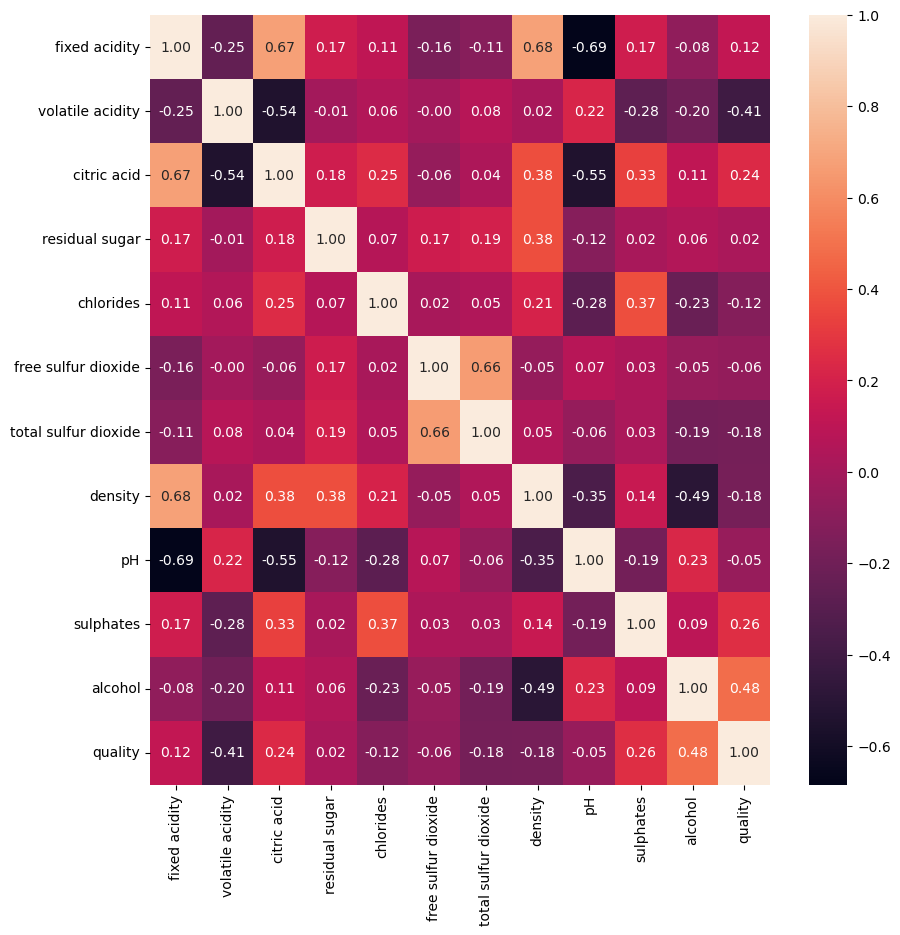

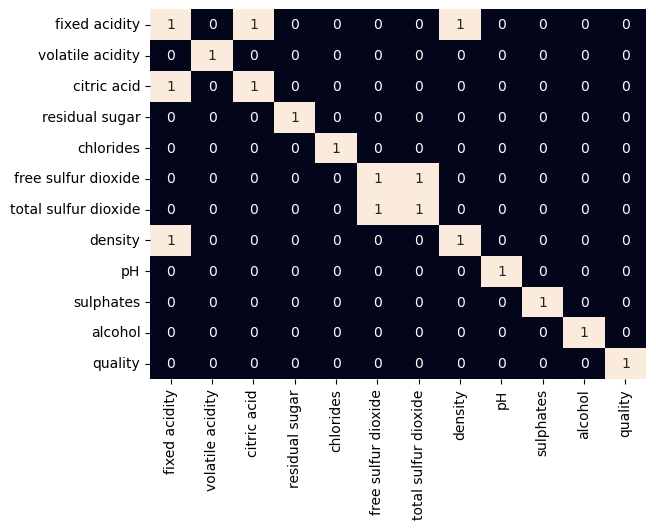

In [3]:
df.drop("Id", axis=1, inplace=True) # Never gonna use, just deleting
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(),annot=True,fmt= ".2f")
plt.show() #Heatmap of Correlation between inputs and output
sns.heatmap(df.corr() >= 0.6,annot=True, cbar=False)
plt.show() #Heatmap of HIGH Correlation 

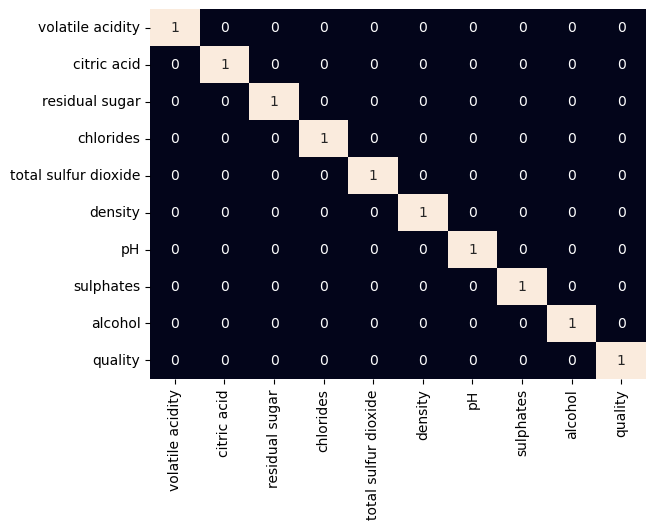

In [4]:
df.drop("free sulfur dioxide", axis=1, inplace=True)
df.drop("fixed acidity", axis=1, inplace=True)
sb.heatmap(df.corr() >= 0.6, annot=True, cbar=False)
plt.show()

In [5]:
X = df[['volatile acidity', 'total sulfur dioxide', 'alcohol', 'sulphates', 'density', 'pH', 'chlorides' , 'residual sugar', 'citric acid']]
y = df['quality']
print(X)
print(y)

      volatile acidity  total sulfur dioxide  alcohol  sulphates  density  \
0                0.700                  34.0      9.4       0.56  0.99780   
1                0.880                  67.0      9.8       0.68  0.99680   
2                0.760                  54.0      9.8       0.65  0.99700   
3                0.280                  60.0      9.8       0.58  0.99800   
4                0.700                  34.0      9.4       0.56  0.99780   
...                ...                   ...      ...        ...      ...   
1138             0.510                  40.0     11.0       0.75  0.99574   
1139             0.620                  38.0      9.5       0.82  0.99651   
1140             0.600                  44.0     10.5       0.58  0.99490   
1141             0.550                  51.0     11.2       0.76  0.99512   
1142             0.645                  44.0     10.2       0.71  0.99547   

        pH  chlorides  residual sugar  citric acid  
0     3.51      0.076 

In [6]:
def plotGraph(y_test,y_pred,regressorName):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.scatter(range(len(y_test)), y_test, color='blue', s = 12)
    plt.scatter(range(len(y_pred)), y_pred, color='red', alpha=0.5, s = 12)
    plt.title(regressorName)
    plt.legend(labels = ('y_test', 'y_pred'))
    plt.figure(figsize=(100, 10))
    plt.show()
    return
#This is the function to plot y_test and y_pred in onee figure

In [7]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

MSE: 0.34766
RMSE: 0.58963
R-squared: 0.40067


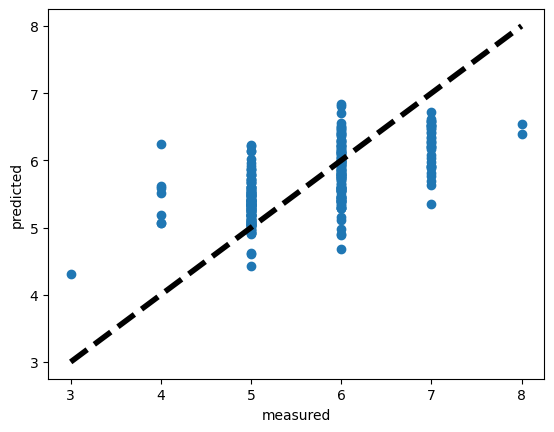

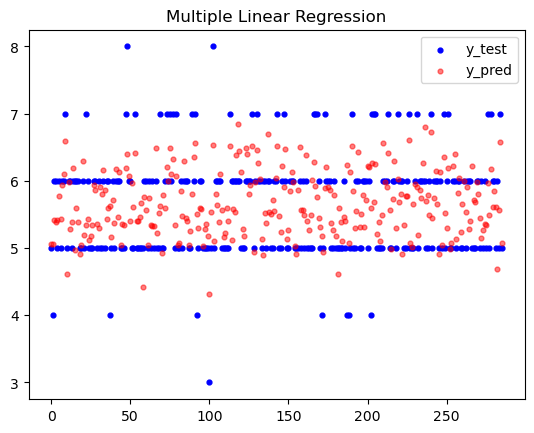

<Figure size 10000x1000 with 0 Axes>

In [8]:
# Create the model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error, and R^2 score
mse_a = mean_squared_error(y_test, y_pred)
r2_a = r2_score(y_test, y_pred)

# Calculate the RMSE
rmse_a = math.sqrt(mse_a)

# Print the results
print(f'MSE: {mse_a:.5f}')
print(f'RMSE: {rmse_a:.5f}')
print(f'R-squared: {r2_a:.5f}')

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show() #Plot is different because outputs are not float number, all of them are integers


plotGraph(y_test,y_pred,'Multiple Linear Regression')



In [9]:
# Create a list of degrees to try
degrees = [1, 2, 3, 4, 5, 6 ,7]

# Initialize a list to store the results
results = []

# Loop through each degree
for degree in degrees:
  # Create polynomial features up to the given degree
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly= poly_features.fit_transform(X)

  # Fit a linear regression model
    model = LinearRegression()
    model.fit(X_poly, y)

  # Make predictions
    y_pred = model.predict(X_poly)

  # Calculate the mean absolute error
    mae = mean_absolute_error(y, y_pred)

  # Calculate the mean squared error
    mse = mean_squared_error(y, y_pred)

  # Calculate the R^2 score
    r2 = r2_score(y, y_pred)

  # Calculate the root mean squared error
    rmse = np.sqrt(mse)

  # Append the results to the list
    results.append([mae, mse, r2, rmse])

# Print the results
print(results[0]) # First degree 
print(results[1]) # Second degree
print(results[2]) # Third degree
print(results[3]) # Fourth degree
print(results[4]) # Fifth degree
print(results[5]) # Sixth degree THE BEST
print(results[6]) # Seventh degree

mse_c = results[5][1] #Sixth degree
r2_c = results[5][2]  #Sixth degree
rmse_c = results[5][3]#Sixth degree

# Print the results
print(f'MSE: {mse_c:.5f}')
print(f'RMSE: {rmse_c:.5f}')
print(f'R-squared: {r2_c:.5f}')




[0.49593512550694935, 0.406541889619124, 0.373379260655902, 0.6376063751399637]
[0.4760568998025939, 0.3680268217022509, 0.4327442140597686, 0.6066521422547281]
[0.39605073987567235, 0.26928645012456875, 0.5849370537670979, 0.5189281743406969]
[0.2397611478205802, 0.11739854859629534, 0.8190484985735302, 0.34263471598233497]
[0.2355887921479892, 0.09647500631486061, 0.8512988665402201, 0.31060425997539154]
[0.20193675096890373, 0.0737676517429201, 0.8862987021629367, 0.2716020098285727]
[0.266380145201592, 0.130239304810757, 0.7992564811743355, 0.36088683102983543]
MSE: 0.07377
RMSE: 0.27160
R-squared: 0.88630


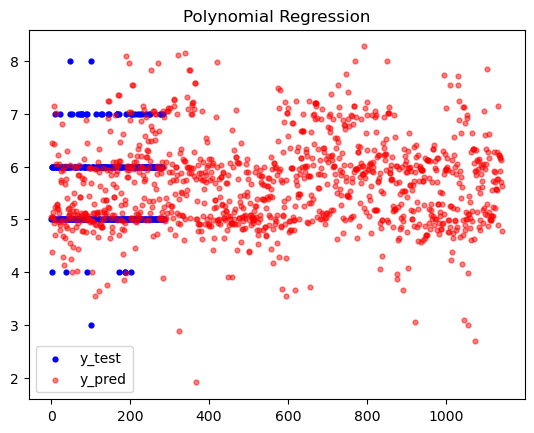

<Figure size 10000x1000 with 0 Axes>

In [10]:
poly_features = PolynomialFeatures(degree=6, include_bias=False)
X_poly= poly_features.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

y_pred = model.predict(X_poly)
plotGraph(y_test,y_pred,'Polynomial Regression')

In [11]:
# Create the model
model = LogisticRegression(max_iter=10000)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error, and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate the RMSE
rmse = math.sqrt(mse)

# Print the results
print(f'MSE: {mse:.5f}')
print(f'RMSE: {rmse:.5f}')
print(f'R-squared: {r2:.5f}')

MSE: 0.45105
RMSE: 0.67160
R-squared: 0.22245


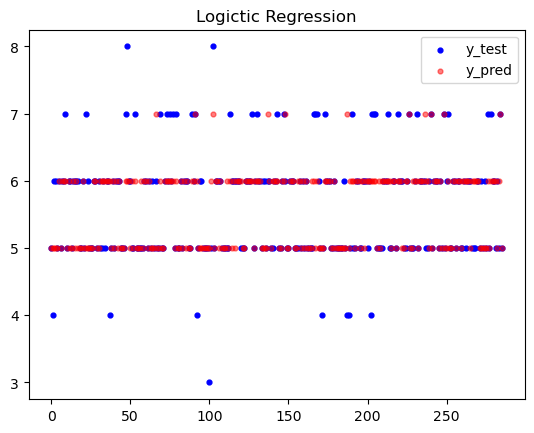

<Figure size 10000x1000 with 0 Axes>

In [12]:
plotGraph(y_test,y_pred,'Logictic Regression')

MSE: 0.44337
RMSE: 0.66586
R-squared: 0.23570


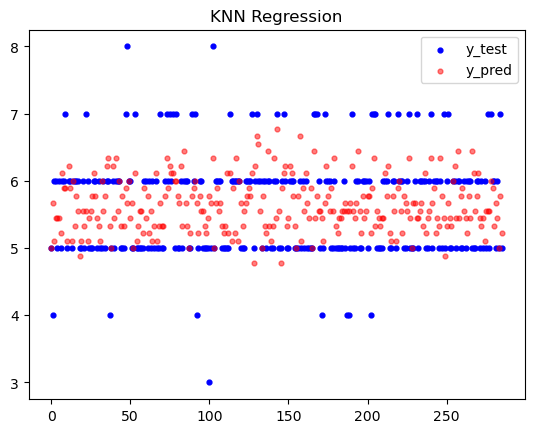

<Figure size 10000x1000 with 0 Axes>

In [13]:
# Create the model
model = KNeighborsRegressor(n_neighbors = 9)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error, and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate the RMSE
rmse = math.sqrt(mse)

# Print the results
print(f'MSE: {mse:.5f}')
print(f'RMSE: {rmse:.5f}')
print(f'R-squared: {r2:.5f}')
plotGraph(y_test,y_pred,'KNN Regression')

MSE: 0.56643
RMSE: 0.75262
R-squared: 0.02354


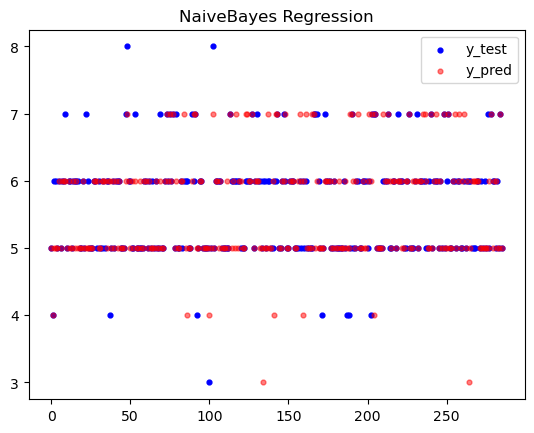

<Figure size 10000x1000 with 0 Axes>

In [14]:
# Create the model
model = GaussianNB()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error, and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate the RMSE
rmse = math.sqrt(mse)

# Print the results
print(f'MSE: {mse:.5f}')
print(f'RMSE: {rmse:.5f}')
print(f'R-squared: {r2:.5f}')

plotGraph(y_test,y_pred,'NaiveBayes Regression')

In [15]:
# Create the model
model = DecisionTreeRegressor(random_state = 0)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error, and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate the RMSE
rmse = math.sqrt(mse)

# Print the results
print(f'MSE: {mse:.5f}')
print(f'RMSE: {rmse:.5f}')
print(f'R-squared: {r2:.5f}')
#R-squared is minus. Simply means that the chosen model (with its constraints) fits the data really poorly.

MSE: 0.62937
RMSE: 0.79333
R-squared: -0.08495


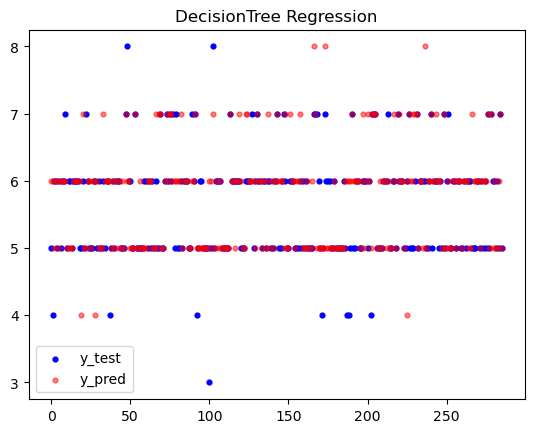

<Figure size 10000x1000 with 0 Axes>

In [16]:
plotGraph(y_test,y_pred,'DecisionTree Regression')

In [17]:
# Create the model
model = RandomForestRegressor(n_estimators = 101)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error, and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
    
# Calculate the RMSE
rmse = math.sqrt(mse)

# Print the results
print(f'MSE: {mse:.5f}')
print(f'RMSE: {rmse:.5f}')
print(f'R-squared: {r2:.5f}') #Best 0.45

MSE: 0.32955
RMSE: 0.57407
R-squared: 0.43189


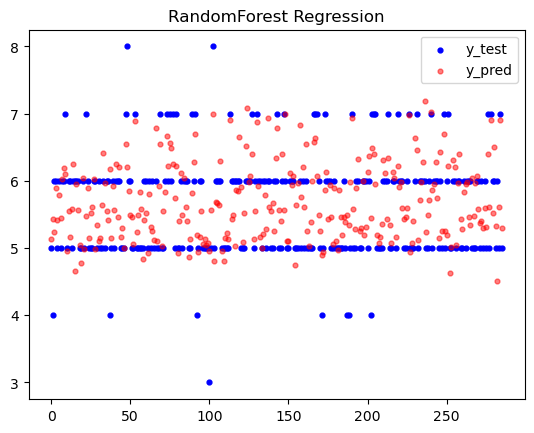

<Figure size 10000x1000 with 0 Axes>

In [18]:
plotGraph(y_test,y_pred,'RandomForest Regression')

In [19]:
# Fit an SVR model
model = SVR()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the MSE, R^2 score, and RMSE
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the results
print(f'MSE: {mse:.5f}')
print(f'RMSE: {rmse:.5f}')
print(f'R-squared: {r2:.5f}') 

MSE: 0.51153
RMSE: 0.71522
R-squared: 0.11818


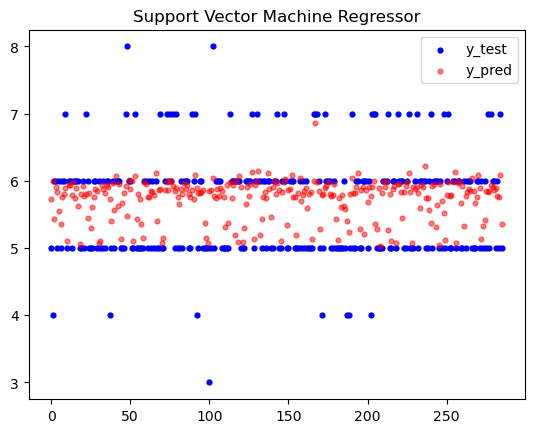

<Figure size 10000x1000 with 0 Axes>

In [20]:
plotGraph(y_test,y_pred,'Support Vector Machine Regressor')

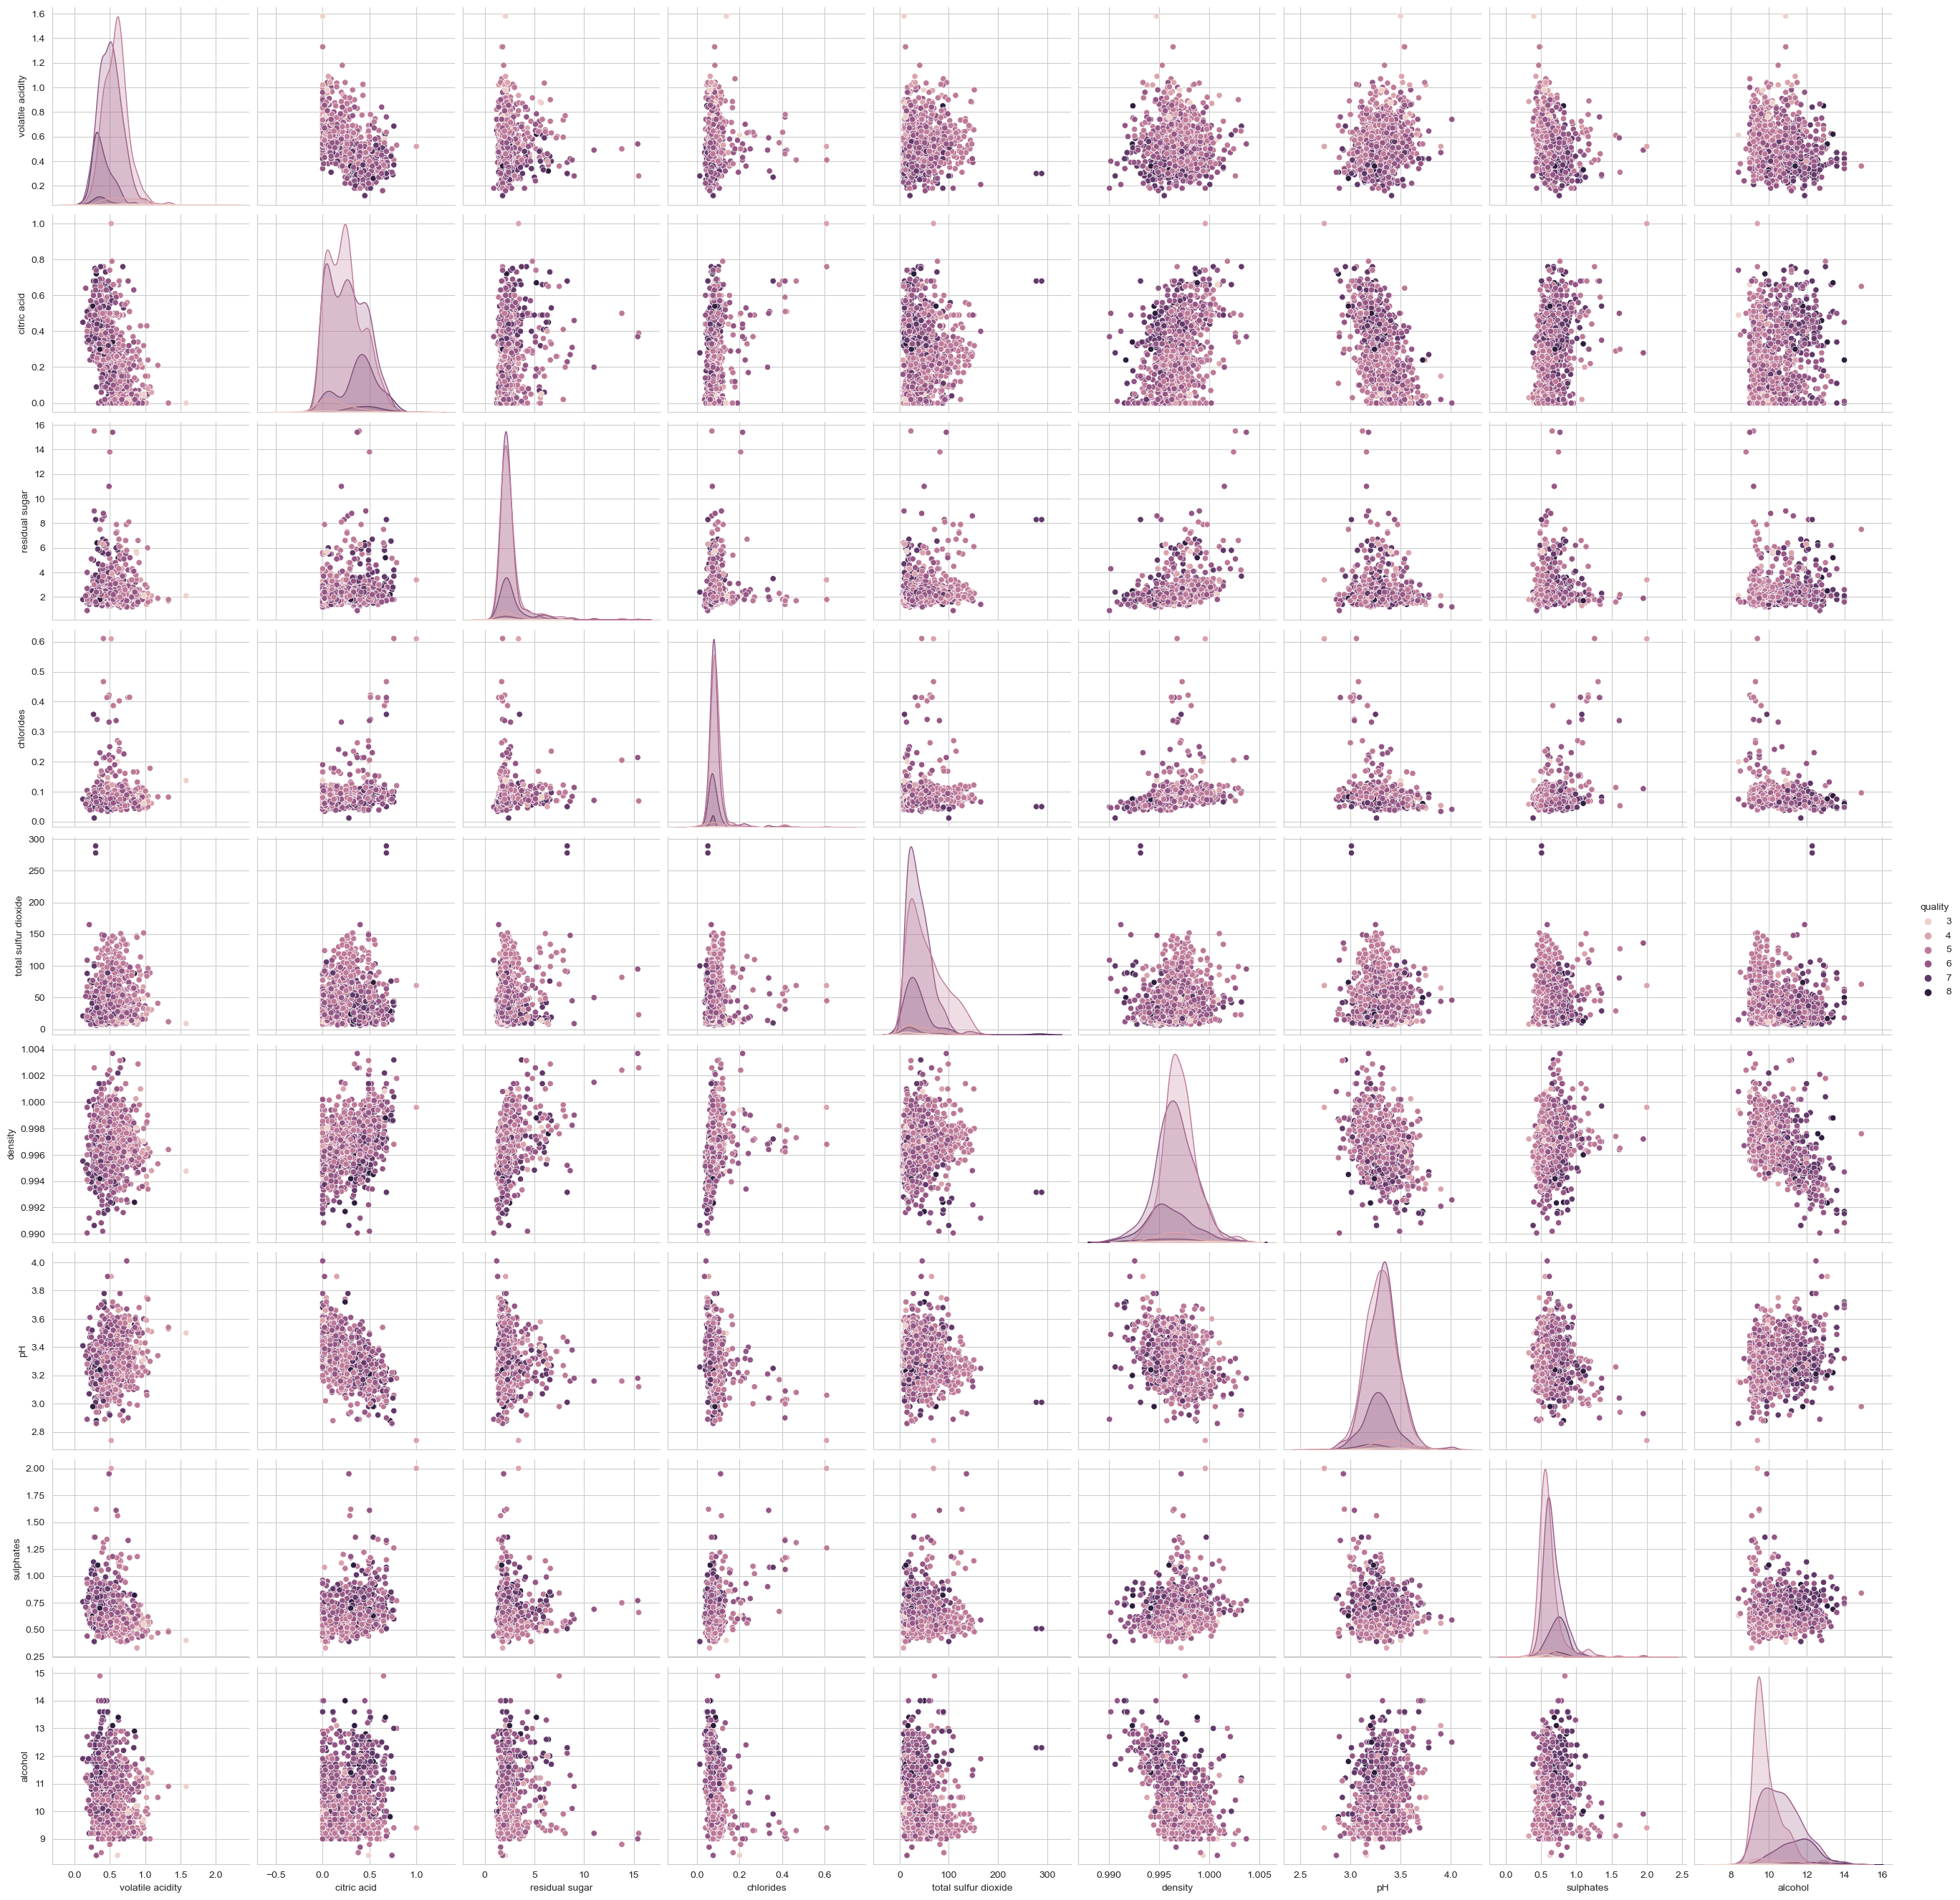

In [21]:
sns.set_style('whitegrid');
sns.pairplot(df, hue='quality', height=3);
plt.show()